
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [22]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
from matplotlib.widgets import Button
import scipy

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [14]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [36]:
# complete here if you want to include more columns
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

#seaborn.set(rc = {'figure.figsize':(15,8)})
#seaborn.histplot(clean_df.salary_monthly_NETO)
max_quantiles = df['salary_monthly_NETO'].quantile([.95, .98, .99, .995, .998, .999])
min_quantiles = df['salary_monthly_NETO'].quantile([.001, .005, .01, .05])

for key in min_quantiles.keys():
  developers_on_quantile = len(df[df.salary_monthly_NETO < min_quantiles[key]])
  print('Hay {}% de programadores en el quartil {} que ganan MENOS de {}'.format('%.4f'% (developers_on_quantile/len(df)), key*100, min_quantiles[key]))

print('=================================')
for key in max_quantiles.keys():
  developers_on_quantile = len(df[df.salary_monthly_NETO > max_quantiles[key]])
  print('Hay {}% de programadores en el quartil {} que ganan MAS de {}'.format('%.4f'% (developers_on_quantile/len(df)), key*100, max_quantiles[key]))

Hay 0.0010% de programadores en el quartil 0.1 que ganan MENOS de 12.528000000000002
Hay 0.0049% de programadores en el quartil 0.5 que ganan MENOS de 37.25943
Hay 0.0097% de programadores en el quartil 1.0 que ganan MENOS de 53.46
Hay 0.0482% de programadores en el quartil 5.0 que ganan MENOS de 22500.0
Hay 0.0482% de programadores en el quartil 95.0 que ganan MAS de 210000.0
Hay 0.0189% de programadores en el quartil 98.0 que ganan MAS de 370000.0
Hay 0.0097% de programadores en el quartil 99.0 que ganan MAS de 491800.0000000029
Hay 0.0044% de programadores en el quartil 99.5 que ganan MAS de 650000.0
Hay 0.0020% de programadores en el quartil 99.8 que ganan MAS de 955289.5199999985
Hay 0.0010% de programadores en el quartil 99.9 que ganan MAS de 1080632.0000000487


A partir de estos resultados podemos utilizar los percentiles 0.5 y 0.98 para eliminar dichas entradas de nuestra muestra de datos, dado que a partir del analisis vemos que estos son los valores que a simple viste suenan más irreales

<Figure size 864x288 with 0 Axes>

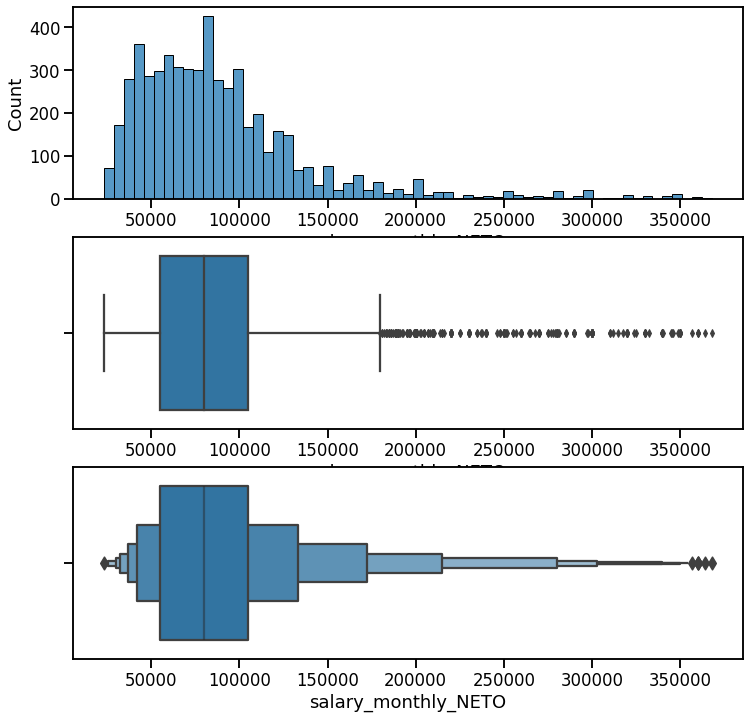

In [16]:
max_thresold = df.salary_monthly_NETO.quantile(0.98)
min_thresold = df.salary_monthly_NETO.quantile(0.05)

clean_df = df[(df.salary_monthly_NETO < max_thresold) & (df.salary_monthly_NETO > min_thresold)].dropna(subset=['salary_monthly_NETO', 'tools_programming_languages'])

plt.figure(figsize=(12, 4))
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
seaborn.histplot(x=clean_df.salary_monthly_NETO, ax=axes[0])
seaborn.boxplot(x=clean_df.salary_monthly_NETO, ax=axes[1])
seaborn.boxenplot(x=clean_df.salary_monthly_NETO, ax=axes[2])


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [17]:
clean_df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [19]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option 
  # I added a new replaace in order to remove people who selected option 'ninguno'
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
clean_df.loc[:, 'cured_programming_languages'] = clean_df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = clean_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(clean_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

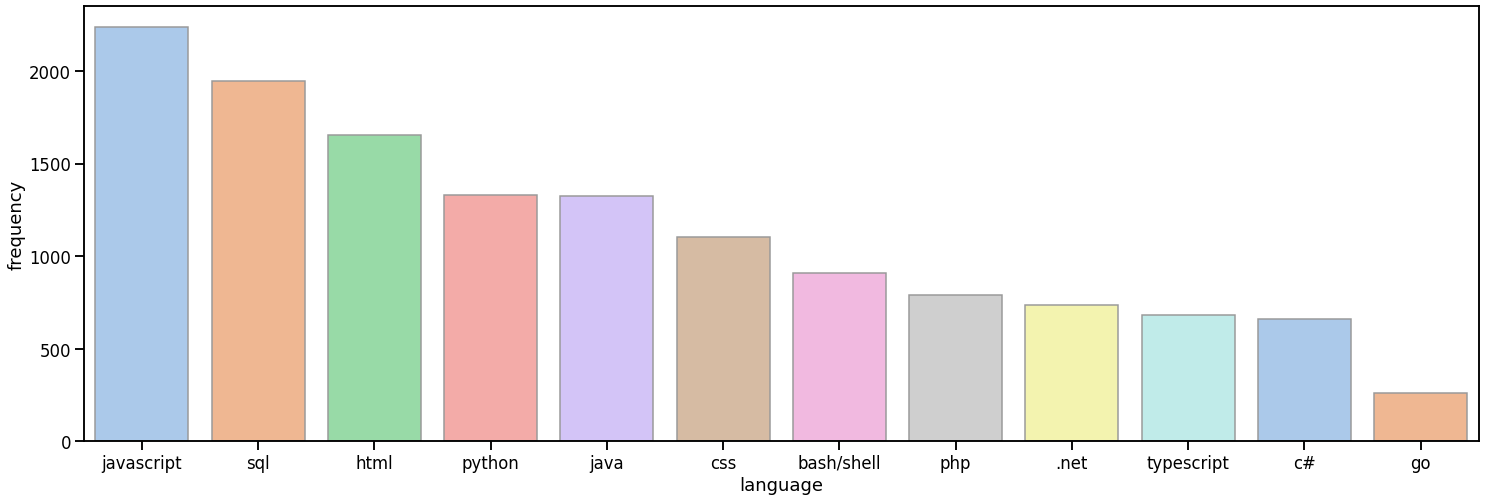

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

# Voy a considerar unicamente como lenguajes populares aquellos que tengan más del 1.5% de votos
required_votes = language_count.frequency.sum() * 0.015
language_count = language_count[language_count.frequency > required_votes]

plt.figure(figsize=(25,8))
seaborn.barplot(x="language", y="frequency" , palette="pastel", edgecolor=".6", data=language_count)

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = language_count.language
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang = filtered_df_lang[['programming_language', 'salary_monthly_NETO']]

In [25]:
for idx, language in enumerate(interesting_languages):
  print('======================{} description======================'.format(language))
  print(filtered_df_lang[filtered_df_lang['programming_language'] == language].describe())
  print("Coeficiente de variación: ", scipy.stats.variation(filtered_df_lang[filtered_df_lang['programming_language'] == language].salary_monthly_NETO))


======================javascript description======================
       salary_monthly_NETO
count          2237.000000
mean          92488.891064
std           57006.048304
min           22980.000000
25%           55000.000000
50%           80000.000000
75%          109214.000000
max          360000.000000
Coeficiente de variación:  0.6162178462229315
======================sql description======================
       salary_monthly_NETO
count          1948.000000
mean          87282.374867
std           48244.692357
min           23000.000000
25%           55000.000000
50%           79000.000000
75%          105000.000000
max          360000.000000
Coeficiente de variación:  0.5526007708456309
======================html description======================
       salary_monthly_NETO
count          1654.000000
mean          86114.377521
std           51981.750608
min           22980.000000
25%           53000.000000
50%           75000.000000
75%          100000.000000
max          36000

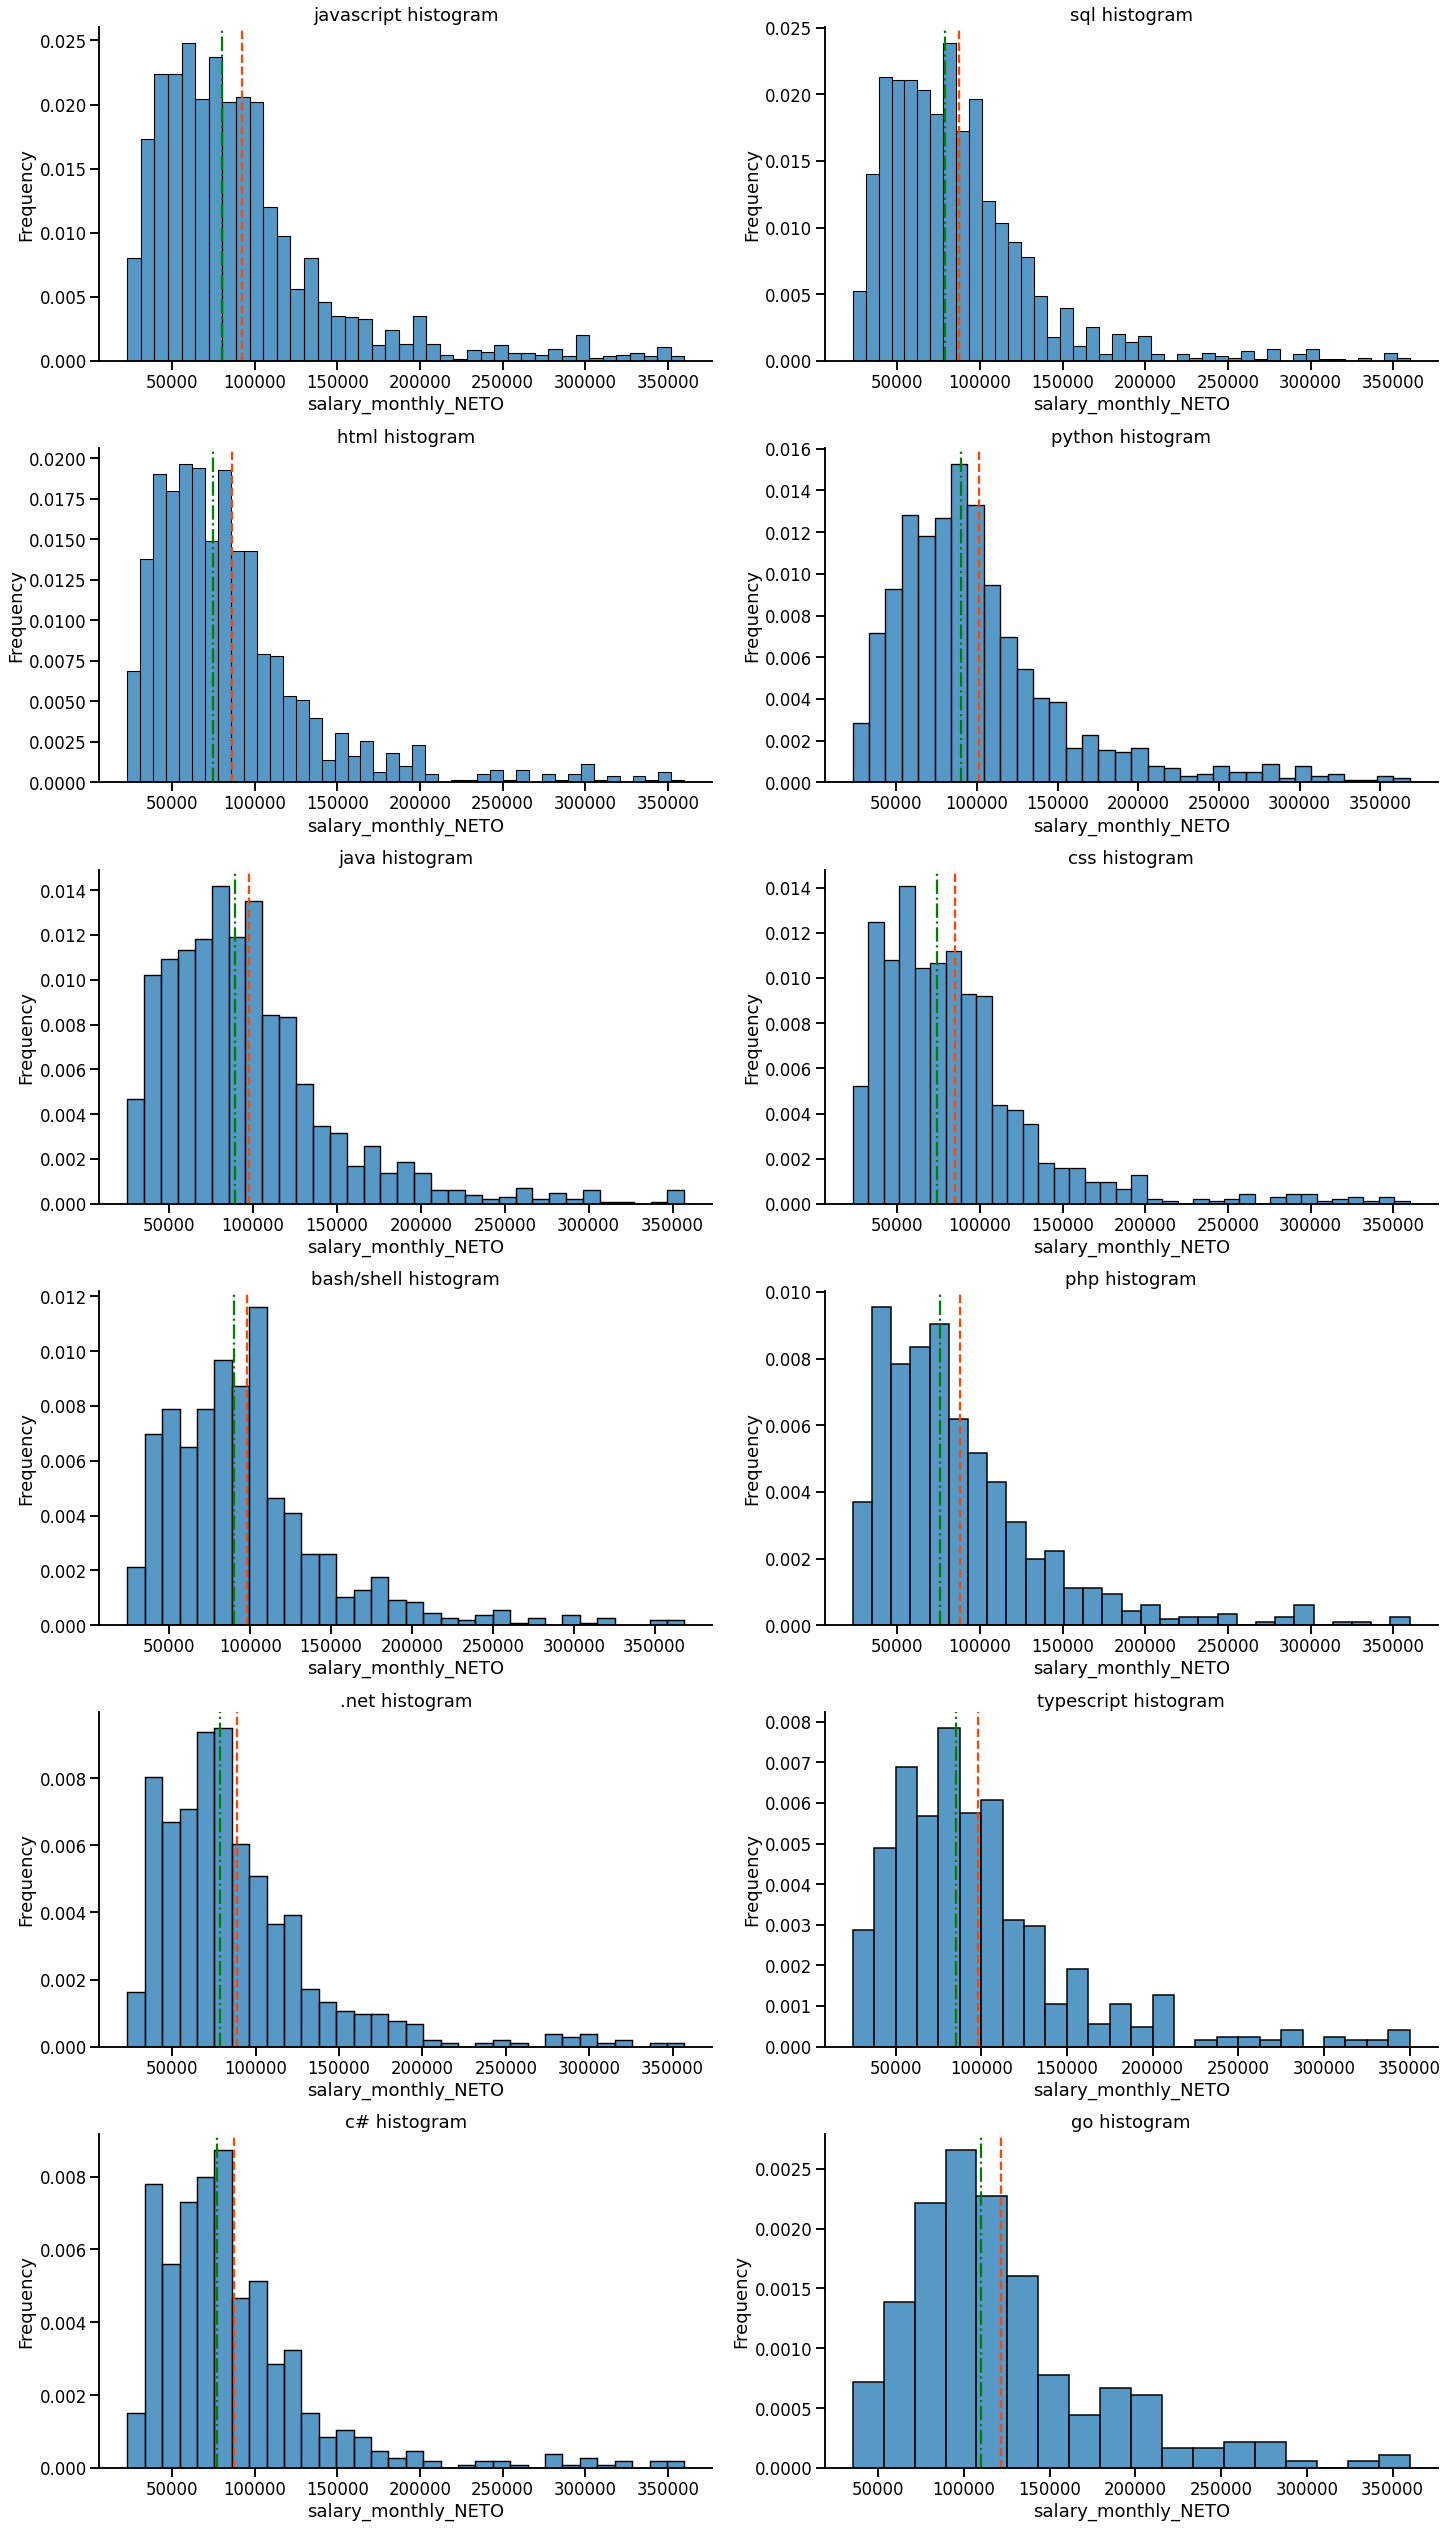

In [11]:
# print(len(filtered_df_lang[filtered_df_lang['programming_language'] == 'javascript']))
filtered_df_lang.programming_language
fig, axes = plt.subplots(6, 2, figsize=(20, 35), constrained_layout = True)
totalElements = len(interesting_languages)
totalColumns = 2;
for idx, language in enumerate(interesting_languages):
   row = int(idx/totalColumns)
   column = idx % totalColumns
   temp_df = filtered_df_lang[filtered_df_lang['programming_language'] == language]
   seaborn.histplot(data=temp_df.salary_monthly_NETO, stat='frequency', ax=axes[row, column]).set(title="{} histogram".format(language))
   axes[row, column].axvline(temp_df.salary_monthly_NETO.mean(), color='orangered', linestyle='--', label='Media')
   axes[row, column].axvline(temp_df.salary_monthly_NETO.median(), color='green', linestyle='-.', label='Mediana')
   seaborn.despine()

In [40]:
salary_mean = filtered_df_lang.salary_monthly_NETO.mean()
print("Los lenguajes de programación que ganan más de: ${}".format('%.2f'%salary_mean))
for language in interesting_languages:
  specific_lang_df = filtered_df_lang[filtered_df_lang.programming_language == language]
  specific_lang_and_higher_mean = specific_lang_df[specific_lang_df.salary_monthly_NETO > salary_mean]
  print("El {}% de las personas que programan en {} ganan más de la media".format('%.1f'% ((len(specific_lang_and_higher_mean)/len(specific_lang_df))*100), language))


Los lenguajes de programación que ganan más de: $92194.90
El 37.5% de las personas que programan en javascript ganan más de la media
El 35.6% de las personas que programan en sql ganan más de la media
El 32.2% de las personas que programan en html ganan más de la media
El 46.6% de las personas que programan en python ganan más de la media
El 46.0% de las personas que programan en java ganan más de la media
El 32.6% de las personas que programan en css ganan más de la media
El 46.8% de las personas que programan en bash/shell ganan más de la media
El 34.4% de las personas que programan en php ganan más de la media
El 34.3% de las personas que programan en .net ganan más de la media
El 43.1% de las personas que programan en typescript ganan más de la media
El 33.1% de las personas que programan en c# ganan más de la media
El 68.0% de las personas que programan en go ganan más de la media


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
